## Dependencias

In [1]:
from auxiliares import categorizar

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer

sns.set()
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Análisis exploratorio de los datos

### Lectura de los datos 

In [2]:
datos = pd.read_csv('~/data_clean.csv')

In [3]:
df=datos.copy()
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target,mths_between_issued_earliest_cr
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,n,credit_card,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,NaN,0.0,NaN,NaN,NaN,0,327.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,n,car,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,NaN,0.0,NaN,NaN,NaN,1,154.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,n,small_business,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,NaN,0.0,NaN,NaN,NaN,0,122.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,n,other,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,NaN,0.0,NaN,NaN,NaN,0,192.0
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,n,other,OR,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,0.0,NaN,0.0,NaN,NaN,NaN,0,193.0


In [4]:
df.shape

(466285, 35)

### tipos de datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 35 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               466285 non-null  int64  
 1   loan_amnt                        466285 non-null  int64  
 2   funded_amnt                      466285 non-null  int64  
 3   funded_amnt_inv                  466285 non-null  float64
 4   term                             466285 non-null  int64  
 5   int_rate                         466285 non-null  float64
 6   installment                      466285 non-null  float64
 7   grade                            466285 non-null  object 
 8   sub_grade                        466285 non-null  object 
 9   emp_length                       445277 non-null  object 
 10  home_ownership                   466285 non-null  object 
 11  annual_inc                       466281 non-null  float64
 12  ve

### Definición de las variables

In [6]:
varc=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc',
       'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'tot_cur_bal', 'total_rev_hi_lim', 
       'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog',
       'mths_between_issued_earliest_cr','collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'delinq_2yrs', 'inq_last_6mths', 'pub_rec']

#sub_grade
vard=['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan',
       'purpose', 'addr_state', 'initial_list_status', ]

um = ['id']

target=['target']

In [7]:
len(varc),len(vard)

(23, 9)

### Análisis de las variables continuas

#### Valores faltantes

<Axes: title={'center': 'Porcentaje de valores nulos en variables continuas'}>

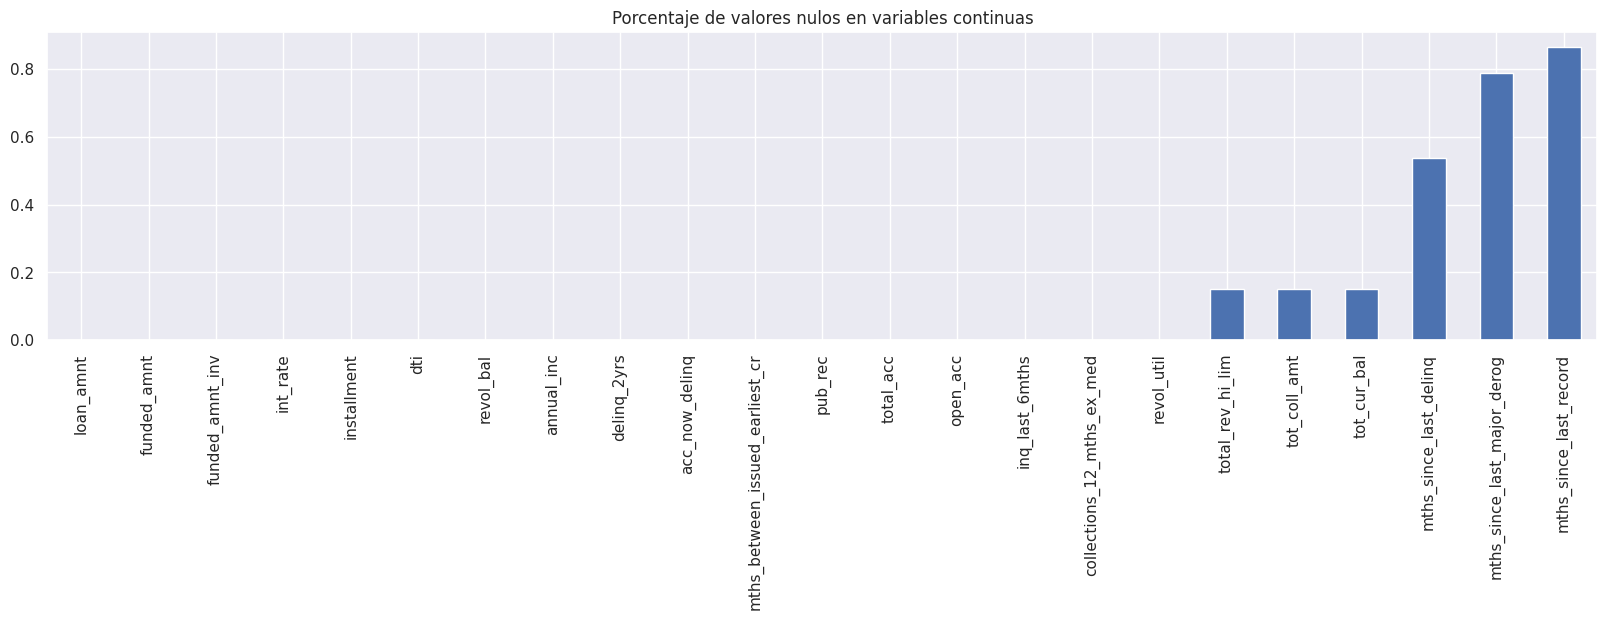

In [8]:
df[varc].isna().mean().sort_values().plot(kind='bar',figsize=(20,4),title='Porcentaje de valores nulos en variables continuas')

In [9]:
im = SimpleImputer(strategy='median')
im.fit(df[varc])

SimpleImputer(strategy='median')

In [10]:
X_i=pd.DataFrame(im.transform(df[varc]),columns=varc) #imputamos valores faltantes con la mediana
X_i.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,mths_since_last_delinq,mths_since_last_record,mths_since_last_major_derog,mths_between_issued_earliest_cr,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,delinq_2yrs,inq_last_6mths,pub_rec
0,5000.0,5000.0,4975.0,10.65,162.87,24000.0,27.65,3.0,13648.0,83.7,9.0,81539.0,22800.0,31.0,76.0,42.0,327.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2500.0,2500.0,2500.0,15.27,59.83,30000.0,1.00,3.0,1687.0,9.4,4.0,81539.0,22800.0,31.0,76.0,42.0,154.0,0.0,0.0,0.0,0.0,5.0,0.0
2,2400.0,2400.0,2400.0,15.96,84.33,12252.0,8.72,2.0,2956.0,98.5,10.0,81539.0,22800.0,31.0,76.0,42.0,122.0,0.0,0.0,0.0,0.0,2.0,0.0
3,10000.0,10000.0,10000.0,13.49,339.31,49200.0,20.00,10.0,5598.0,21.0,37.0,81539.0,22800.0,35.0,76.0,42.0,192.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3000.0,3000.0,3000.0,12.69,67.79,80000.0,17.94,15.0,27783.0,53.9,38.0,81539.0,22800.0,38.0,76.0,42.0,193.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#calculamos estadistico ks
ks=pd.DataFrame(map(lambda x: (x,round(stats.ks_2samp(X_i[x],df[x].dropna()).statistic,3)),varc),columns=['variable','ks']) 
ks

,variable,ks
0,loan_amnt,0.000
1,funded_amnt,0.000
2,funded_amnt_inv,0.000
3,int_rate,0.000
4,installment,0.000
5,annual_inc,0.000
6,dti,0.000
7,open_acc,0.000
8,revol_bal,0.000
9,revol_util,0.000


In [12]:
# variables con ks menor a .1, no las afecta la imputacion
varc=ks['variable'][ks['ks']<.1].tolist()
# variables con ks mayor a .1, las vamos a discretizar
vard.extend(ks['variable'][ks['ks']>.1].tolist())

#### Discretización de variables continuas

In [13]:
vars_disc=[]
for bin in range(3,11,2):    
    bins=bin
    kb=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy='quantile')
    aux=pd.DataFrame(kb.fit_transform(X_i[varc]),columns=[f'{var}_{bins}' for var in varc])
    mapa={var:{k:v for k,v in enumerate(vals)} for var,vals in \
          zip(aux.columns,map(lambda x:[*map(lambda x:str(x).replace(')',']'),zip(x,x[1:]))],kb.bin_edges_))}
    aux=aux.replace(mapa)
    vars_disc.append(aux)

In [14]:
X_disc=pd.concat(vars_disc,axis=1)
X_disc.head()

,loan_amnt_3,funded_amnt_3,funded_amnt_inv_3,int_rate_3,installment_3,annual_inc_3,dti_3,open_acc_3,revol_bal_3,revol_util_3,total_acc_3,tot_cur_bal_3,total_rev_hi_lim_3,mths_between_issued_earliest_cr_3,collections_12_mths_ex_med_3,acc_now_delinq_3,tot_coll_amt_3,delinq_2yrs_3,inq_last_6mths_3,pub_rec_3,loan_amnt_5,funded_amnt_5,funded_amnt_inv_5,int_rate_5,installment_5,annual_inc_5,dti_5,open_acc_5,revol_bal_5,revol_util_5,total_acc_5,tot_cur_bal_5,total_rev_hi_lim_5,mths_between_issued_earliest_cr_5,collections_12_mths_ex_med_5,acc_now_delinq_5,tot_coll_amt_5,delinq_2yrs_5,inq_last_6mths_5,pub_rec_5,loan_amnt_7,funded_amnt_7,funded_amnt_inv_7,int_rate_7,installment_7,annual_inc_7,dti_7,open_acc_7,revol_bal_7,revol_util_7,total_acc_7,tot_cur_bal_7,total_rev_hi_lim_7,mths_between_issued_earliest_cr_7,collections_12_mths_ex_med_7,acc_now_delinq_7,tot_coll_amt_7,delinq_2yrs_7,inq_last_6mths_7,pub_rec_7,loan_amnt_9,funded_amnt_9,funded_amnt_inv_9,int_rate_9,installment_9,annual_inc_9,dti_9,open_acc_9,revol_bal_9,revol_util_9,total_acc_9,tot_cur_bal_9,total_rev_hi_lim_9,mths_between_issued_earliest_cr_9,collections_12_mths_ex_med_9,acc_now_delinq_9,tot_coll_amt_9,delinq_2yrs_9,inq_last_6mths_9,pub_rec_9
0,"(500.0, 10000.0]","(500.0, 10000.0]","(0.0, 9900.0]","(5.42, 11.99]","(15.67, 300.39]","(1896.0, 50000.0]","(20.63, 39.99]","(0.0, 9.0]","(8050.0, 16768.0]","(68.8, 892.3]","(1.0, 19.0]","(48529.0, 136668.00000000012]","(18500.0, 28100.0]","(214.0, 854.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 29.0]","(1.0, 33.0]","(0.0, 63.0]","(500.0, 7000.0]","(500.0, 7000.0]","(0.0, 7000.0]","(9.91, 12.49]","(15.67, 226.37]","(1896.0, 41600.0]","(24.21, 39.99]","(0.0, 7.0]","(9451.0, 14527.0]","(78.5, 892.3]","(1.0, 15.0]","(69888.6, 95390.39999999997]","(21600.0, 24200.0]","(256.0, 854.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 29.0]","(1.0, 2.0]","(0.0, 63.0]","(500.0, 6000.0]","(500.0, 6000.0]","(0.0, 5699.730000000003]","(8.9, 11.14]","(15.67, 189.1]","(1896.0, 37435.00000000006]","(26.19, 39.99]","(0.0, 6.0]","(10080.0, 13682.0]","(83.2, 892.3]","(1.0, 13.0]","(81539.0, 164427.0]","(22800.0, 31400.0]","(287.0, 854.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 1.0]","(1.0, 2.0]","(0.0, 63.0]","(5000.0, 7425.0]","(5000.0, 7375.0]","(0.0, 5000.0]","(10.16, 11.99]","(15.67, 168.45]","(1896.0, 35000.0]","(27.5, 39.99]","(0.0, 6.0]","(13230.0, 16768.0]","(76.8, 86.1]","(1.0, 12.0]","(81539.0, 136667.99999999994]","(22800.0, 28100.0]","(307.0, 854.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 1.0]","(1.0, 2.0]","(0.0, 1.0]"
1,"(500.0, 10000.0]","(500.0, 10000.0]","(0.0, 9900.0]","(11.99, 15.59]","(15.67, 300.39]","(1896.0, 50000.0]","(0.0, 13.27]","(0.0, 9.0]","(0.0, 8050.0]","(0.0, 46.0]","(1.0, 19.0]","(48529.0, 136668.00000000012]","(18500.0, 28100.0]","(149.0, 214.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 29.0]","(1.0, 33.0]","(0.0, 63.0]","(500.0, 7000.0]","(500.0, 7000.0]","(0.0, 7000.0]","(14.49, 17.57]","(15.67, 226.37]","(1896.0, 41600.0]","(0.0, 10.11]","(0.0, 7.0]","(0.0, 5442.0]","(0.0, 34.8]","(1.0, 15.0]","(69888.6, 95390.39999999997]","(21600.0, 24200.0]","(123.0, 159.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 29.0]","(2.0, 33.0]","(0.0, 63.0]","(500.0, 6000.0]","(500.0, 6000.0]","(0.0, 5699.730000000003]","(14.33, 15.99]","(15.67, 189.1]","(1896.0, 37435.00000000006]","(0.0, 8.47]","(0.0, 6.0]","(0.0, 4313.0]","(0.0, 28.8]","(1.0, 13.0]","(81539.0, 164427.0]","(22800.0, 31400.0]","(141.0, 164.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 1.0]","(2.0, 33.0]","(0.0, 63.0]","(500.0, 5000.0]","(500.0, 5000.0]","(0.0, 5000.0]","(14.27, 15.59]","(15.67, 168.45]","(1896.0, 35000.0]","(0.0, 7.43]","(0.0, 6.0]","(0.0, 3640.0]","(0.0, 24.8]","(1.0, 12.0]","(81539.0, 136667.99999999994]","(22800.0, 28100.0]","(149.0, 167.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 1.0]","(2.0, 33.0]","(0.0, 1.0]"
2,"(500.0, 10000.0]","(500.0, 10000.0]

### Análisis de las variables discretas

#### Valores faltantes

<Axes: title={'center': 'Porcentaje de valores nulos en variables discretas'}>

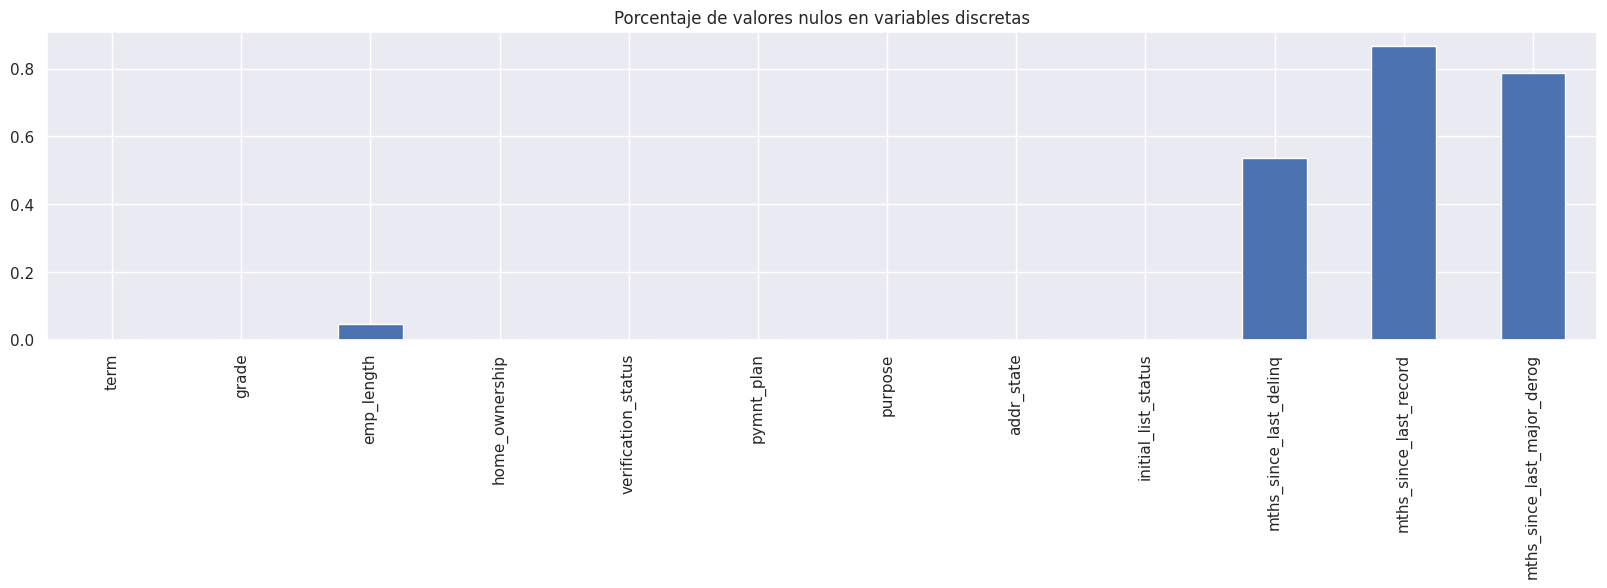

In [15]:
df[vard].isna().mean().plot(kind='bar',figsize=(20,4),title='Porcentaje de valores nulos en variables discretas')

In [16]:
df[vard]=df[vard].astype('str').applymap(str.lower).astype('category')

#### Frequencias de las variables discretas

In [17]:
for var in vard:
    print(var.center(50,'-'))
    print(df[var].value_counts(normalize=True,dropna=False))
    print('-'*50+'\n')

-----------------------term-----------------------
36    0.724778
60    0.275222
Name: term, dtype: float64
--------------------------------------------------

----------------------grade-----------------------
b    0.293659
c    0.268705
d    0.164895
a    0.160561
e    0.076685
f    0.028371
g    0.007124
Name: grade, dtype: float64
--------------------------------------------------

--------------------emp_length--------------------
10+ years    0.321797
2 years      0.088729
3 years      0.078484
< 1 year     0.077774
5 years      0.065998
1 year       0.063528
4 years      0.060098
7 years      0.056146
6 years      0.056000
8 years      0.048029
nan          0.045054
9 years      0.038363
Name: emp_length, dtype: float64
--------------------------------------------------

------------------home_ownership------------------
mortgage    0.505860
rent        0.404201
own         0.089439
other       0.000500
Name: home_ownership, dtype: float64
---------------------------------------

In [18]:
df['grade']=df['grade'].replace({'e':'e+','f':'e+','g':'e+'})
df['purpose']=categorizar(df,'purpose',.05,'other')
df['mths_since_last_delinq']=pd.qcut(df['mths_since_last_delinq'].astype(float), 4, retbins=False)
df['mths_since_last_record']=pd.qcut(df['mths_since_last_record'].astype(float), 4, retbins=False)
df['mths_since_last_major_derog']=pd.qcut(df['mths_since_last_major_derog'].astype(float), 4, retbins=False)

In [19]:
df[vard]=df[vard].astype('str').astype('category').replace('nan','missing')

In [20]:
for var in vard:
    print(var.center(50,'-'))
    print(df[var].value_counts(normalize=True))
    print('-'*50+'\n')

-----------------------term-----------------------
36    0.724778
60    0.275222
Name: term, dtype: float64
--------------------------------------------------

----------------------grade-----------------------
b     0.293659
c     0.268705
d     0.164895
a     0.160561
e+    0.112180
Name: grade, dtype: float64
--------------------------------------------------

--------------------emp_length--------------------
10+ years    0.321797
2 years      0.088729
3 years      0.078484
< 1 year     0.077774
5 years      0.065998
1 year       0.063528
4 years      0.060098
7 years      0.056146
6 years      0.056000
8 years      0.048029
missing      0.045054
9 years      0.038363
Name: emp_length, dtype: float64
--------------------------------------------------

------------------home_ownership------------------
mortgage    0.505860
rent        0.404201
own         0.089439
other       0.000500
Name: home_ownership, dtype: float64
--------------------------------------------------

----------

## Guardar los datos discretizados

In [21]:
muestra=pd.concat([df[um],df[vard],X_disc,df[target]],axis=1)
muestra.head()

,id,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,mths_since_last_delinq,mths_since_last_record,mths_since_last_major_derog,loan_amnt_3,funded_amnt_3,funded_amnt_inv_3,int_rate_3,installment_3,annual_inc_3,dti_3,open_acc_3,revol_bal_3,revol_util_3,total_acc_3,tot_cur_bal_3,total_rev_hi_lim_3,mths_between_issued_earliest_cr_3,collections_12_mths_ex_med_3,acc_now_delinq_3,tot_coll_amt_3,delinq_2yrs_3,inq_last_6mths_3,pub_rec_3,loan_amnt_5,funded_amnt_5,funded_amnt_inv_5,int_rate_5,installment_5,annual_inc_5,dti_5,open_acc_5,revol_bal_5,revol_util_5,total_acc_5,tot_cur_bal_5,total_rev_hi_lim_5,mths_between_issued_earliest_cr_5,collections_12_mths_ex_med_5,acc_now_delinq_5,tot_coll_amt_5,delinq_2yrs_5,inq_last_6mths_5,pub_rec_5,loan_amnt_7,funded_amnt_7,funded_amnt_inv_7,int_rate_7,installment_7,annual_inc_7,dti_7,open_acc_7,revol_bal_7,revol_util_7,total_acc_7,tot_cur_bal_7,total_rev_hi_lim_7,mths_between_issued_earliest_cr_7,collections_12_mths_ex_med_7,acc_now_delinq_7,tot_coll_amt_7,delinq_2yrs_7,inq_last_6mths_7,pub_rec_7,loan_amnt_9,funded_amnt_9,funded_amnt_inv_9,int_rate_9,installment_9,annual_inc_9,dti_9,open_acc_9,revol_bal_9,revol_util_9,total_acc_9,tot_cur_bal_9,total_rev_hi_lim_9,mths_between_issued_earliest_cr_9,collections_12_mths_ex_med_9,acc_now_delinq_9,tot_coll_amt_9,delinq_2yrs_9,inq_last_6mths_9,pub_rec_9,target
0,1077501,36,b,10+ years,rent,verified,n,credit_card,az,f,missing,missing,missing,"(500.0, 10000.0]","(500.0, 10000.0]","(0.0, 9900.0]","(5.42, 11.99]","(15.67, 300.39]","(1896.0, 50000.0]","(20.63, 39.99]","(0.0, 9.0]","(8050.0, 16768.0]","(68.8, 892.3]","(1.0, 19.0]","(48529.0, 136668.00000000012]","(18500.0, 28100.0]","(214.0, 854.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 29.0]","(1.0, 33.0]","(0.0, 63.0]","(500.0, 7000.0]","(500.0, 7000.0]","(0.0, 7000.0]","(9.91, 12.49]","(15.67, 226.37]","(1896.0, 41600.0]","(24.21, 39.99]","(0.0, 7.0]","(9451.0, 14527.0]","(78.5, 892.3]","(1.0, 15.0]","(69888.6, 95390.39999999997]","(21600.0, 24200.0]","(256.0, 854.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 29.0]","(1.0, 2.0]","(0.0, 63.0]","(500.0, 6000.0]","(500.0, 6000.0]","(0.0, 5699.730000000003]","(8.9, 11.14]","(15.67, 189.1]","(1896.0, 37435.00000000006]","(26.19, 39.99]","(0.0, 6.0]","(10080.0, 13682.0]","(83.2, 892.3]","(1.0, 13.0]","(81539.0, 164427.0]","(22800.0, 31400.0]","(287.0, 854.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 1.0]","(1.0, 2.0]","(0.0, 63.0]","(5000.0, 7425.0]","(5000.0, 7375.0]","(0.0, 5000.0]","(10.16, 11.99]","(15.67, 168.45]","(1896.0, 35000.0]","(27.5, 39.99]","(0.0, 6.0]","(13230.0, 16768.0]","(76.8, 86.1]","(1.0, 12.0]","(81539.0, 136667.99999999994]","(22800.0, 28100.0]","(307.0, 854.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 1.0]","(1.0, 2.0]","(0.0, 1.0]",0
1,1077430,60,c,< 1 year,rent,source verified,n,other,ga,f,missing,missing,missing,"(500.0, 10000.0]","(500.0, 10000.0]","(0.0, 9900.0]","(11.99, 15.59]","(15.67, 300.39]","(1896.0, 50000.0]","(0.0, 13.27]","(0.0, 9.0]","(0.0, 8050.0]","(0.0, 46.0]","(1.0, 19.0]","(48529.0, 136668.00000000012]","(18500.0, 28100.0]","(149.0, 214.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 29.0]","(1.0, 33.0]","(0.0, 63.0]","(500.0, 7000.0]","(500.0, 7000.0]","(0.0, 7000.0]","(14.49, 17.57]","(15.67, 226.37]","(1896.0, 41600.0]","(0.0, 10.11]","(0.0, 7.0]","(0.0, 5442.0]","(0.0, 34.8]","(1.0, 15.0]","(69888.6, 95390.39999999997]","(21600.0, 24200.0]","(123.0, 159.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 29.0]","(2.0, 33.0]","(0.0, 63.0]","(500.0, 6000.0]","(500.0, 6000.0]","(0.0, 5699.730000000003]","(14.33, 15.99]","(15.67, 189.1]","(1896.0, 37435.00000000006]","(0.0, 8.47]","(0.0, 6.0]","(0.0, 4313.0]","(0.0, 28.8]","(1.0, 13.0]","(81539.0, 164427.0]","(22800.0, 31400.0]","(141.0, 164.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 1.0]","(2.0, 33.0]","(0.0, 63.0]","(500.0, 5000.0]","

In [22]:
muestra.to_csv('~/datos_discretizados.csv',index=False)

In [25]:
print(varc)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'tot_cur_bal', 'total_rev_hi_lim', 'mths_between_issued_earliest_cr', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec']


In [26]:
print(vard)

['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']
